# Exploratory Data Analysis for Revenue Forecasting

This notebook performs initial exploratory analysis on the sales data to understand its structure, trends, and characteristics.

## 1. Load Data

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '../data/sales_data_2016_2023.csv'
data = pd.read_csv(file_path)

# Convert to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data.set_index('Date', inplace=True)

# Display the first few rows
data.head()

,Product,Category,Price,Quantity,Rating,Revenue
Date,,,,,,
2016-01-01,Monitor,Computers,146,19,3.1,6581
2016-01-02,Smartphone,Computers,156,28,2.4,7661
2016-01-03,Router,Accessories,852,22,4.7,5134
2016-01-04,Headphones,Networking,490,26,1.2,7070
2016-01-05,Camera,Accessories,422,5,2.8,2811


## 2. Data Overview and Summary Statistics

In [20]:
# Summary statistics
data.describe()

,Price,Quantity,Rating,Revenue
count,1000.00000,1000.000000,1000.00000,1000.000000
mean,509.51100,25.245000,3.03940,6080.032000
std,280.91568,14.394797,1.15217,2309.819556
min,20.00000,1.000000,1.00000,2003.000000
25%,265.00000,13.000000,2.10000,4081.250000
50%,493.50000,25.000000,3.00000,6106.500000
75%,760.50000,38.000000,4.10000,8146.500000
max,999.00000,50.000000,5.00000,9992.000000


## 3. Visualizing Revenue Over Time

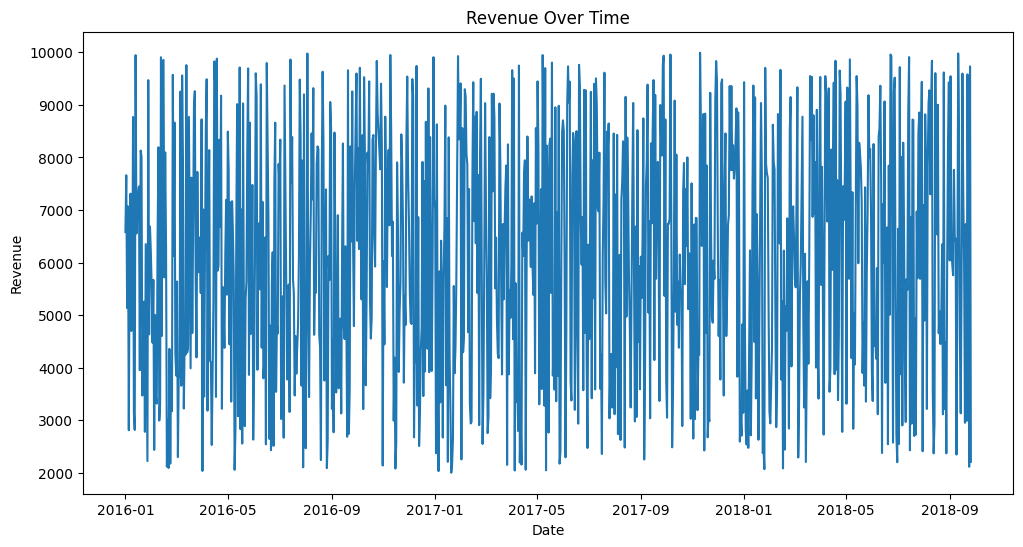

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Revenue"])
plt.title("Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

## 4. Check for Seasonality and Trends

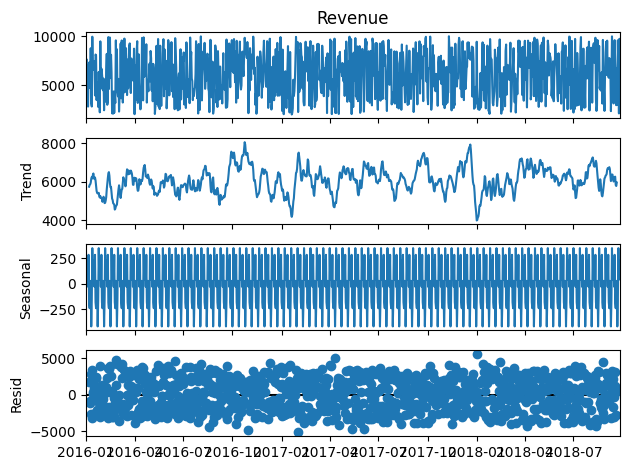

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data["Revenue"], model="additive", period=12)
decomposition.plot()
plt.show()

## 5. Stationarity Test (ADF Test)

In [23]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data["Revenue"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -14.598872966897384
p-value: 4.197261442635563e-27
